# 1.1 Generalized Linear Models
  
The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the input variables.  
In mathematical notion, if $\hat{y}$ is the predicted value.  
  
$\hat{y}(w,\ x)=w_{0}+w_{1}x_{1}+\cdots+w_{p}x_{p}$  
  
Across the module, we designate the vector $w = (w_1,\cdots, w_p)$ as `coef_` and $w_{0}$ as `intercept_`.

## 1.1.1 Ordinary Least Squares
  
  
>`sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)`  
  
  
  
$\underset{w}{min\,} {|| X w - y||_2}^2$  
  
  
LinearRegression will take in its `fit` method arrays $X$, $y$ and will store the coefficients $w$ of the linear model in its `coef_` member:  
  

In [1]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [2]:
reg.coef_

array([0.5, 0.5])

However, coefficient estimates for Ordinary Least Squares rely on the independence of the model terms. When terms are correlated and the columns of the design matrix $X$ have an approximate linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed response, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

## 1.1.2 Ridge Regression
  
>`sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)`  
  
  
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,  
  


$\underset{w}{min\,} {{|| X w - y||_2}^2 + \alpha {||w||_2}^2}$
  
Here, $\alpha \geq 0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.  
  
  

In [3]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha = 0.5)
reg.fit([[0, 0], [0 ,0], [1, 1]], [0, 0.1, 1])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [4]:
reg.coef_

array([0.34545455, 0.34545455])

In [5]:
reg.intercept_

0.13636363636363638

### Plot Ridge coefficients as a function of the regularization
  
Shows the effect of collinearity in the coefficients of an estimator.  

Ridge Regression is the estimator used in this example. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter.  

This example also shows the usefulness of applying Ridge regression to highly ill-conditioned matrices. For such matrices, a slight change in the target variable can cause huge variances in the calculated weights. In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise).  
  
**When alpha is very large, the regularization effect dominates the squared loss function and the coefficients tend to zero. At the end of the path, as alpha tends toward zero and the solution tends towards the ordinary least squares, coefficients exhibit big oscillations. In practise it is necessary to tune alpha in such a way that a balance is maintained between both.**  

Automatically created module for IPython interactive environment


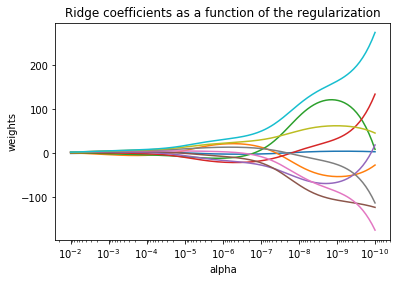

In [6]:
%matplotlib inline
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

RidgeCV implements ridge regression with built-in cross-validation of the alpha parameter. The object works in the same way as GridSearchCV except that it defaults to Generalized Cross-Validation (GCV), an efficient form of leave-one-out cross-validation.  
  
You shouldn't use leave-one-out cross validation for some reasons:  
http://univprof.com/archives/16-07-08-4554815.html

## 1.1.3 Lasso 
  
>`sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)`  
  
The Lasso is a linear model that estimates sparse coefficients. **It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent.** For this reason, the Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero weights.  
  
Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:  
  
$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$  
  
The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha ||w||_1$ added, where $\alpha$ is a constant and $||w||_1$ is the $\ell_1$-norm of the parameter vector.  
  
The implementation in the class Lasso uses *coordinate descent* as the algorithm to fit the coefficients.
  
The `alpha` parameter controls the degree of sparsity of the coefficients estimated.  
  
**About Coordinate descent**: https://www.slideshare.net/amp-kyoto/coordinate-descent  
  

In [7]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
reg.predict([[1, 1]])

array([0.8])

**What is the difference between Ridge and Lasso?**  
here: https://qiita.com/nanairoGlasses/items/57515340a1bc24ffe445  
  
>|名称|正則化項|特徴|
|---|-------|---|
|ラッソ回帰|L1ノルム  |不要なパラメータ(次元・特徴量)を削ることができる|
|リッジ回帰|L2ノルム  |過学習を抑えることができる|
|直線回帰  |なし  |過学習を起こしやすい|  
>どの特徴量がグラフに影響を与えているのかを見つけるにはラッソを用いるのがベターであり、（単純な最小二乗法よりも）過学習を抑えつつ相関を見つけたいならばロッソがベターである。  
  
  

scikit-learn exposes objects that set the Lasso alpha parameter by cross-validation: LassoCV and LassoLarsCV. LassoLarsCV is based on the Least Angle Regression algorithm explained [here](http://scikit-learn.org/stable/modules/linear_model.html#using-cross-validation).

## 1.1.4 Multi-task Lasso
  
>`sklearn.linear_model.MultiTaskLasso(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, random_state=None, selection=’cyclic’)`  
  
The MultiTaskLasso is a linear model that estimates sparse coefficients for multiple regression problems jointly: `y` is a 2D array, of shape `(n_samples, n_tasks)`. The constraint is that the selected features are the same for all the regression problems, also called tasks.  
  
  
  

### Joint feature selection with multi-task Lasso
  
**The multi-task lasso allows to fit multiple regression problems jointly enforcing the selected features to be the same across tasks.** This example simulates sequential measurements, each task is a time instant, and the relevant features vary in amplitude over time while being the same. **The multi-task lasso imposes that features that are selected at one time point are select for all time point. This makes feature selection by the Lasso more stable.  **

Automatically created module for IPython interactive environment


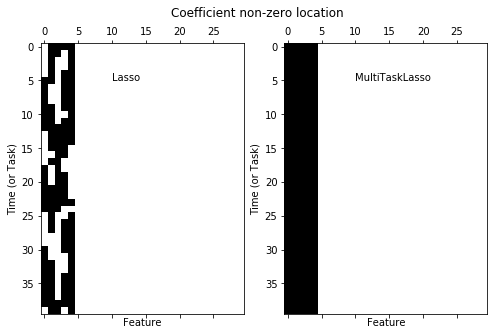

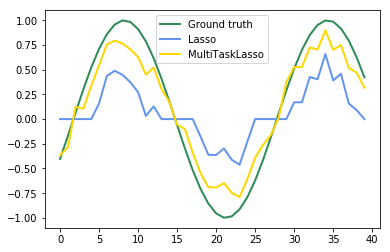

In [9]:
%matplotlib inline
print(__doc__)

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import MultiTaskLasso, Lasso

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

# #############################################################################
# Plot support and time series
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'MultiTaskLasso')
fig.suptitle('Coefficient non-zero location')

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])
plt.show()

## 1.1.5 Elastic Net

>`sklearn.linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)`  
  
What is L1/L2?: https://tjo.hatenablog.com/entry/2015/03/03/190000  
  
ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. **This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge.** We control the convex combination of L1 and L2 using the `l1_ratio` parameter.  
  
**Elastic-net is useful when there are multiple features which are correlated with one another.** Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.  
  
**A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.**  
  
The objective function to minimize is in this case  
  


$\underset{w}{min\,} { \frac{1}{2n_{samples}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$
  
The class ElasticNetCV can be used to set the parameters `alpha` ($\alpha$) and `l1_ratio` ($\rho$) by cross-validation.  
  

Automatically created module for IPython interactive environment
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.385982
ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.240498


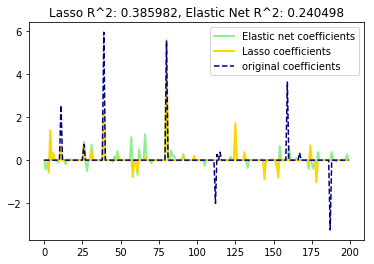

In [10]:
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

# #############################################################################
# Generate some sparse data to play with
np.random.seed(42)

n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0  # sparsify coef
y = np.dot(X, coef)

# add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[:n_samples // 2], y[:n_samples // 2]
X_test, y_test = X[n_samples // 2:], y[n_samples // 2:]

# #############################################################################
# Lasso
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

# #############################################################################
# ElasticNet
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lasso.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

## 1.1.6 Multi-task Elastic Net
  
>`sklearn.linear_model.MultiTaskElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, random_state=None, selection=’cyclic’)`  
  
The MultiTaskElasticNet is an elastic-net model that estimates sparse coefficients for multiple regression problems jointly: `Y` is a 2D array, of shape `(n_samples, n_tasks)`. The constraint is that the selected features are the same for all the regression problems, also called tasks.  
  
Mathematically, it consists of a linear model trained with a mixed $\ell_1$ $\ell_2$ prior and $\ell_2$ prior as regularizer. The objective function to minimize is:  
  
$\underset{W}{min\,} { \frac{1}{2n_{samples}} ||X W - Y||_{Fro}^2 + \alpha \rho ||W||_{2 1} + \frac{\alpha(1-\rho)}{2} ||W||_{Fro}^2}$
  
The implementation in the class MultiTaskElasticNet uses coordinate descent as the algorithm to fit the coefficients.  
  
The class MultiTaskElasticNetCV can be used to set the parameters `alpha` ($\alpha$) and `l1_ratio` ($\rho$) by cross-validation.    
  
  
  
  
  
  
  

## 1.1.7 Least Angle Regression
  
>`sklearn.linear_model.Lars(fit_intercept=True, verbose=False, normalize=True, precompute=’auto’, n_nonzero_coefs=500, eps=2.2204460492503131e-16, copy_X=True, fit_path=True, positive=False)`  
  
**Least-angle regression (LARS) is a regression algorithm for high-dimensional data**, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani. LARS is similar to forward stepwise regression. **At each step, it finds the predictor most correlated with the response. When there are multiple predictors having equal correlation, instead of continuing along the same predictor, it proceeds in a direction equiangular between the predictors.**  
  
The advantages of LARS are:  
  
- It is numerically efficient in contexts where p >> n (i.e., when the number of dimensions is significantly greater than the number of points)
- It is computationally just as fast as forward selection and has the same order of complexity as an ordinary least squares.
- It produces a full piecewise linear solution path, which is useful in cross-validation or similar attempts to tune the model.
- If two variables are almost equally correlated with the response, then their coefficients should increase at approximately the same rate. The algorithm thus behaves as intuition would expect, and also is more stable.
- It is easily modified to produce solutions for other estimators, like the Lasso.
  
The disadvantages of the LARS method include:  

- Because LARS is based upon an iterative refitting of the residuals, it would appear to be especially sensitive to the effects of noise. This problem is discussed in detail by Weisberg in the discussion section of the Efron et al. (2004) Annals of Statistics article.
  
The LARS model can be used using estimator `Lars`, or its low-level implementation `lars_path`.  


## 1.1.8 LARS Lasso
  
>`sklearn.linear_model.LassoLars(alpha=1.0, fit_intercept=True, verbose=False, normalize=True, precompute=’auto’, max_iter=500, eps=2.2204460492503131e-16, copy_X=True, fit_path=True, positive=False)`  
  
LassoLars is a lasso model implemented using the LARS algorithm, and unlike the implementation based on coordinate_descent, this yields the exact solution, which is piecewise linear as a function of the norm of its coefficients.  
  
     

The Lars algorithm provides the full path of the coefficients along the regularization parameter almost for free, thus a common operation consist of retrieving the path with function `lars_path`. 

[Lasso path using LARS](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-py)

## 1.1.9 Orthogonal Matching Pursuit (OMP)
  
>`sklearn.linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs=None, tol=None, fit_intercept=True, normalize=True, precompute=’auto’)`  
  
About Pursuit Algorithm: [here](https://qiita.com/kibo35/items/66ec4479b0899ea4987d)  
  
  
[What is a 'Greedy algorithm'?](https://www.hackerearth.com/ja/practice/algorithms/greedy/basics-of-greedy-algorithms/tutorial/)  
  
A greedy algorithm, as the name suggests, always makes the choice that seems to be the best at that moment. This means that it makes a locally-optimal choice in the hope that this choice will lead to a globally-optimal solution.  
  
How do you decide which choice is optimal?  
  
Assume that you have an objective function that needs to be optimized (either maximized or minimized) at a given point. A Greedy algorithm makes greedy choices at each step to ensure that the objective function is optimized. The Greedy algorithm has only one shot to compute the optimal solution so that it never goes back and reverses the decision.  
  
Greedy algorithms have some advantages and disadvantages:  
  
1. It is quite easy to come up with a greedy algorithm (or even multiple greedy algorithms) for a problem.
  
2. Analyzing the run time for greedy algorithms will generally be much easier than for other techniques (like Divide and conquer). For the Divide and conquer technique, it is not clear whether the technique is fast or slow. This is because at each level of recursion the size of gets smaller and the number of sub-problems increases.
  
3. The difficult part is that for greedy algorithms you have to work much harder to understand correctness issues. Even with the correct algorithm, it is hard to prove why it is correct. Proving that a greedy algorithm is correct is more of an art than a science. It involves a lot of creativity.
  
[About Feature Selection method](https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/)  
  
OrthogonalMatchingPursuit and orthogonal_mp implements **the OMP algorithm for approximating the fit of a linear model with constraints imposed on the number of non-zero coefficients (ie. the L 0 pseudo-norm).**  
  
Being a forward feature selection method like Least Angle Regression, **orthogonal matching pursuit can approximate the optimum solution vector with a fixed number of non-zero elements:**  
  
$ \arg \min \ ||y - X\gamma||_2^2 \text{ subject to } \ ||\gamma||_0 \leq n_{nonzero\_coefs}$
  
Alternatively, orthogonal matching pursuit can target a specific error instead of a specific number of non-zero coefficients. This can be expressed as:  
  
$ \arg \min\  ||\gamma||_0 \text{ subject to } ||y-X\gamma||_2^2 \ \leq \text{tol}$
  
OMP is based on a greedy algorithm that includes at each step the atom most highly correlated with the current residual. It is similar to the simpler matching pursuit (MP) method, but better in that at each iteration, the residual is recomputed using an orthogonal projection on the space of the previously chosen dictionary elements.  
  
Example: [Orthogonal Matching Pursuit](http://scikit-learn.org/stable/auto_examples/linear_model/plot_omp.html#sphx-glr-auto-examples-linear-model-plot-omp-py)  
  
#### What is Matching Persuit ?  
[スパース信号表現って何？](http://asj-fresh.acoustics.jp/wordpress/wp-content/uploads/2015/12/2015f_beginners_koyama.pdf)  
[スパースモデリング入門 ](https://www.slideshare.net/hideoterada5/ss-55178990)  
[冗長変換とその画像復元応用](https://www.slideshare.net/ShogoMuramatsu/ss-49305095)  
[Orthogonal Matching Pursuitの実用例](http://junzo.sakura.ne.jp/c_plus69/c_plus69.html)

  

## 1.1.10. Bayesian Regression
  
[pythonでベイズ線形回帰実装](https://qiita.com/ta-ka/items/8ee3cb7ecb17e58f4f78)  
[Pythonで「線形回帰」と"確率版の線形回帰"である「ベイズ線形回帰」](https://qiita.com/ysdyt/items/05a884354741bd9ca82b)  
  
Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.  
  
This can be done by introducing uninformative priors over the hyper parameters of the model. The $\ell_{2}$ regularization used in Ridge Regression is equivalent to finding a maximum a posteriori estimation under a Gaussian prior over the parameters w with precision $\lambda^{-1}$. Instead of setting lambda manually, it is possible to treat it as a random variable to be estimated from the data.  
  
To obtain a fully probabilistic model, the output $y$ is assumed to be Gaussian distributed around $X w$:  
  
$p(y|X,w,\alpha) = \mathcal{N}(y|X w,\alpha)$
  
Alpha is again treated as a random variable that is to be estimated from the data.    
  
The advantages of Bayesian Regression are:  
  
- **It adapts to the data at hand.**
- **It can be used to include regularization parameters in the estimation procedure.**
  
The disadvantages of Bayesian regression include:  

- **Inference of the model can be time consuming.**
  
### 1.1.10.1. Bayesian Ridge Regression
  
>`sklearn.linear_model.BayesianRidge(n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06, compute_score=False, fit_intercept=True, normalize=False, copy_X=True, verbose=False)`  
  
BayesianRidge estimates a probabilistic model of the regression problem as described above. The prior for the parameter w is given by a spherical Gaussian:
  
$p(w|\lambda) = \mathcal{N}(w|0,\lambda^{-1}{\bf I_{p}})$  
  
The priors over $\alpha$ and $\lambda$ are chosen to be gamma distributions, the conjugate prior for the precision of the Gaussian.  
  
The resulting model is called Bayesian Ridge Regression, and is similar to the classical Ridge. The parameters $w$, $\alpha$ and $\lambda$ are estimated jointly during the fit of the model. The remaining hyperparameters are the parameters of the gamma priors over $\alpha$ and $\lambda$. These are usually chosen to be non-informative. The parameters are estimated by maximizing the marginal log likelihood.

By default $\alpha_1 = \alpha_2 = \lambda_1 = \lambda_2 = 10^{-6}$.
 
 
[SG Series Part 2: Spherical Gaussians 101](https://mynameismjp.wordpress.com/2016/10/09/sg-series-part-2-spherical-gaussians-101/)  
[球面ガウス関数を極める-動的間接照明の高速近似-](http://www.jp.square-enix.com/tech/library/pdf/SphericalGaussians_CEDEC2015.pdf)  
[ガンマ分布の意味と期待値、分散](https://mathtrain.jp/gammadist)
  
Bayesian Ridge Regression is used for regression:
  

In [11]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

After being fitted, the model can then be used to predict new values:

In [12]:
reg.predict([[1, 0.0]])

array([0.50000013])

The weights $w$ of the model can be access:

In [13]:
reg.coef_

array([0.49999993, 0.49999993])

Due to the Bayesian framework, the weights found are slightly different to the ones found by Ordinary Least Squares. However, Bayesian Ridge Regression is more robust to ill-posed problem.   
  
*ill-posed problem* is opposite of *well-posed problem*  
Well-posed problems are:  
- Having a solution
- Having a unique solution
- Having a solution that depends continuously on the parameters or input data.

  

### 1.1.10.2. Automatic Relevance Determination - ARD  
  
>`sklearn.linear_model.ARDRegression(n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06, compute_score=False, threshold_lambda=10000.0, fit_intercept=True, normalize=False, copy_X=True, verbose=False)`  
  
ARDRegression is very similar to Bayesian Ridge Regression, but can lead to sparser weights $w$. ARDRegression poses a different prior over $w$, by dropping the assumption of the Gaussian being spherical.  
  
Instead, the distribution over w is assumed to be an axis-parallel, elliptical Gaussian distribution.  
  
This means each weight $w_{i}$ is drawn from a Gaussian distribution, centered on zero and with a precision $\lambda_{i}$:  
  
$p(w|\lambda) = \mathcal{N}(w|0,A^{-1})$  
  
with $diag \; (A) = \lambda = \{\lambda_{1},...,\lambda_{p}\}$.
  
In contrast to Bayesian Ridge Regression, each coordinate of $w_{i}$ has its own standard deviation $\lambda_i$. The prior over all $\lambda_i$ is chosen to be the same gamma distribution given by hyperparameters $\lambda_1$ and $\lambda_2$.

## 1.1.11. Logistic regression
  
>`sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’liblinear’, max_iter=100, multi_class=’ovr’, verbose=0, warm_start=False, n_jobs=1)`  
  
Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.  
  
The implementation of logistic regression in scikit-learn can be accessed from class LogisticRegression. This implementation can fit binary, One-vs- Rest, or multinomial logistic regression with optional L2 or L1 regularization.  
  
As an optimization problem, binary class L2 penalized logistic regression minimizes the following cost function:  
  
$\underset{w, c}{min\,} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$ .  
  
Similarly, L1 regularized logistic regression solves the following optimization problem  
  
$\underset{w, c}{min\,} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$ .  
  
The solvers implemented in the class LogisticRegression are “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”:  
  
In a nutshell, one may choose the solver with the following rules:  

|Case|Solver|
| --- | --- |
|L1 penalty|“liblinear” or “saga”|
|Multinomial loss|“lbfgs”, “sag”, “saga” or “newton-cg”|
|Very Large dataset(n_samples)| “sag” or “saga”|
  
**The “saga” solver is often the best choice.** The “liblinear” solver is used by default for historical reasons.  
  
For large dataset, you may also consider using SGDClassifier with ‘log’ loss.  
  

### L1 Penalty and Sparsity in Logistic Regression
Comparison of the sparsity (percentage of zero coefficients) of solutions when L1 and L2 penalty are used for different values of C. We can see that large values of C give more freedom to the model. Conversely, smaller values of C constrain the model more. In the L1 penalty case, this leads to sparser solutions.

We classify 8x8 images of digits into two classes: 0-4 against 5-9. The visualization shows coefficients of the models for varying C.

Automatically created module for IPython interactive environment
C=100.00
Sparsity with L1 penalty: 6.25%
score with L1 penalty: 0.9087
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9098
C=1.00
Sparsity with L1 penalty: 9.38%
score with L1 penalty: 0.9098
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9093
C=0.01
Sparsity with L1 penalty: 85.94%
score with L1 penalty: 0.8614
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8915


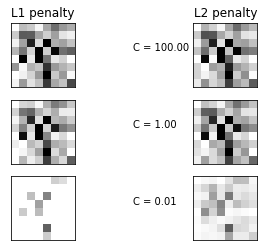

In [14]:
%matplotlib inline
print(__doc__)

# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(np.int)


# Set regularization parameter
for i, C in enumerate((100, 1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()

### Plot multinomial and One-vs-Rest Logistic Regression
  
Plot decision surface of multinomial and One-vs-Rest Logistic Regression. The hyperplanes corresponding to the three One-vs-Rest (OVR) classifiers are represented by the dashed lines.  

Automatically created module for IPython interactive environment
training score : 0.995 (multinomial)
training score : 0.976 (ovr)


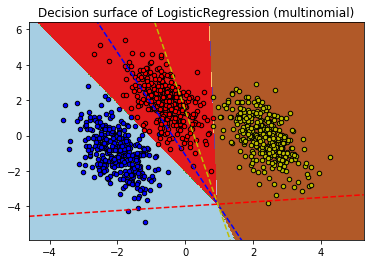

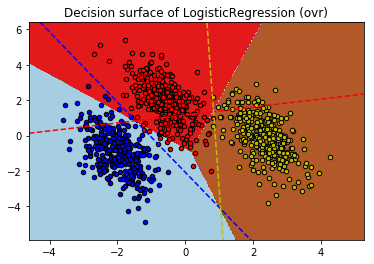

In [15]:
%matplotlib inline
print(__doc__)
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

### Multiclass sparse logisitic regression on newgroups20
  
Comparison of multinomial logistic L1 vs one-versus-rest L1 logistic regression to classify documents from the newgroups20 dataset. Multinomial logistic regression yields more accurate results and is faster to train on the larger scale dataset.  
  
Here we use the l1 sparsity that trims the weights of not informative features to zero. This is good if the goal is to extract the strongly discriminative vocabulary of each class. If the goal is to get the best predictive accuracy, it is better to use the non sparsity-inducing l2 penalty instead.  
  
A more traditional (and possibly better) way to predict on a sparse subset of input features would be to use univariate feature selection followed by a traditional (l2-penalised) logistic regression model.  

Automatically created module for IPython interactive environment
Dataset 20newsgroup, train_samples=9000, n_features=130107, n_classes=20
[model=Multinomial, solver=saga] Number of epochs: 1


/home/tk/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[model=Multinomial, solver=saga] Number of epochs: 3
[model=Multinomial, solver=saga] Number of epochs: 7
Test accuracy for model multinomial: 0.7450
% non-zero coefficients for model multinomial, per class:
 [0.13296748 0.11759552 0.13296748 0.13988486 0.1268187  0.16140561
 0.15218243 0.09069458 0.07762841 0.12143851 0.14910804 0.10837234
 0.18830655 0.1245129  0.168323   0.21828188 0.11605832 0.07839701
 0.06917383 0.15602543]
Run time (7 epochs) for model multinomial:2.99
[model=One versus Rest, solver=saga] Number of epochs: 1
[model=One versus Rest, solver=saga] Number of epochs: 3
Test accuracy for model ovr: 0.7410
% non-zero coefficients for model ovr, per class:
 [0.27054655 0.66330021 0.80395367 0.73247404 0.67713497 0.73477984
 0.40889422 0.48959702 1.01301237 0.56261385 0.60104376 0.332803
 0.7094161  0.85083816 0.56876263 0.65715142 0.64408525 0.81163965
 0.44271254 0.41120001]
Run time (3 epochs) for model ovr:2.38
Example run in 9.445 s


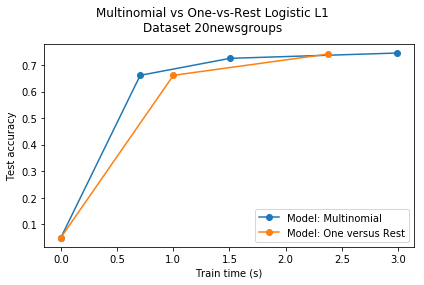

In [16]:
%matplotlib inline
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

print(__doc__)
# Author: Arthur Mensch

t0 = time.clock()

# We use SAGA solver
solver = 'saga'

# Turn down for faster run time
n_samples = 10000

# Memorized fetch_rcv1 for faster access
dataset = fetch_20newsgroups_vectorized('all')
X = dataset.data
y = dataset.target
X = X[:n_samples]
y = y[:n_samples]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    test_size=0.1)
train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print('Dataset 20newsgroup, train_samples=%i, n_features=%i, n_classes=%i'
      % (train_samples, n_features, n_classes))

models = {'ovr': {'name': 'One versus Rest', 'iters': [1, 3]},
          'multinomial': {'name': 'Multinomial', 'iters': [1, 3, 7]}}

for model in models:
    # Add initial chance-level values for plotting purpose
    accuracies = [1 / n_classes]
    times = [0]
    densities = [1]

    model_params = models[model]

    # Small number of epochs for fast runtime
    for this_max_iter in model_params['iters']:
        print('[model=%s, solver=%s] Number of epochs: %s' %
              (model_params['name'], solver, this_max_iter))
        lr = LogisticRegression(solver=solver,
                                multi_class=model,
                                C=1,
                                penalty='l1',
                                fit_intercept=True,
                                max_iter=this_max_iter,
                                random_state=42,
                                )
        t1 = time.clock()
        lr.fit(X_train, y_train)
        train_time = time.clock() - t1

        y_pred = lr.predict(X_test)
        accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
        density = np.mean(lr.coef_ != 0, axis=1) * 100
        accuracies.append(accuracy)
        densities.append(density)
        times.append(train_time)
    models[model]['times'] = times
    models[model]['densities'] = densities
    models[model]['accuracies'] = accuracies
    print('Test accuracy for model %s: %.4f' % (model, accuracies[-1]))
    print('%% non-zero coefficients for model %s, '
          'per class:\n %s' % (model, densities[-1]))
    print('Run time (%i epochs) for model %s:'
          '%.2f' % (model_params['iters'][-1], model, times[-1]))

fig = plt.figure()
ax = fig.add_subplot(111)

for model in models:
    name = models[model]['name']
    times = models[model]['times']
    accuracies = models[model]['accuracies']
    ax.plot(times, accuracies, marker='o',
            label='Model: %s' % name)
    ax.set_xlabel('Train time (s)')
    ax.set_ylabel('Test accuracy')
ax.legend()
fig.suptitle('Multinomial vs One-vs-Rest Logistic L1\n'
             'Dataset %s' % '20newsgroups')
fig.tight_layout()
fig.subplots_adjust(top=0.85)
run_time = time.clock() - t0
print('Example run in %.3f s' % run_time)
plt.show()

### MNIST classfification using multinomial logistic + L1
Here we fit a multinomial logistic regression with L1 penalty on a subset of the MNIST digits classification task. We use the SAGA algorithm for this purpose: this a solver that is fast when the number of samples is significantly larger than the number of features and is able to finely optimize non-smooth objective functions which is the case with the l1-penalty. Test accuracy reaches > 0.8, while weight vectors remains sparse and therefore more easily interpretable.  
  
Note that this accuracy of this l1-penalized linear model is significantly below what can be reached by an l2-penalized linear model or a non-linear multi-layer perceptron model on this dataset.

Automatically created module for IPython interactive environment
Sparsity with L1 penalty: 74.78%
Test score with L1 penalty: 0.8371
Example run in 2.439 s


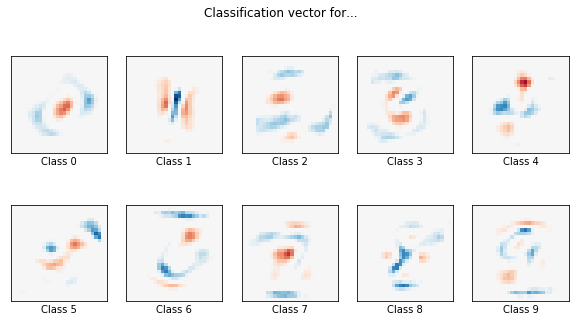

In [17]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

mnist = fetch_mldata('MNIST original')
X = mnist.data.astype('float64')
y = mnist.target
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()


LogisticRegressionCV implements Logistic Regression with builtin cross-validation to find out the optimal C parameter. 

## 1.1.12. Stochastic Gradient Descent - SGD
  
Stochastic gradient descent is a simple yet very efficient approach to fit linear models. It is particularly useful when the number of samples (and the number of features) is very large. The `partial_fit` method allows only/out-of-core learning.  
  
The classes SGDClassifier and SGDRegressor provide functionality to fit linear models for classification and regression using different (convex) loss functions and different penalties. E.g., with loss=`"log"`, SGDClassifier fits a logistic regression model, while with loss=`"hinge"` it fits a linear support vector machine (SVM).  
  
We'll check SGD again in Chapter 1.5.

## 1.1.13. Perceptron
  
>`sklearn.linear_model.Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, eta0=1.0, n_jobs=1, random_state=0, class_weight=None, warm_start=False, n_iter=None)`  
  
The Perceptron is another simple algorithm suitable for large scale learning. By default:  
  
- It does not require a learning rate.
- It is not regularized (penalized).
- It updates its model only on mistakes.
  
The last characteristic implies that the Perceptron is slightly faster to train than SGD with the hinge loss and that the resulting models are sparser.  
  
  

## 1.1.14. Passive Aggressive Algorithms
  
>`sklearn.linear_model.PassiveAggressiveClassifier(C=1.0, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, loss=’hinge’, n_jobs=1, random_state=None, warm_start=False, class_weight=None, average=False, n_iter=None)`  
  
>`sklearn.linear_model.PassiveAggressiveRegressor(C=1.0, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, loss=’epsilon_insensitive’, epsilon=0.1, random_state=None, warm_start=False, average=False, n_iter=None)`  
  
The passive-aggressive algorithms are a family of algorithms for large-scale learning. They are similar to the Perceptron in that they do not require a learning rate. However, contrary to the Perceptron, they include a regularization parameter `C`.  
  
For classification, PassiveAggressiveClassifier can be used with `loss='hinge'` (PA-I) or `loss='squared_hinge'` (PA-II). For regression, PassiveAggressiveRegressor can be used with `loss='epsilon_insensitive'` (PA-I) or `loss='squared_epsilon_insensitive'` (PA-II).  
  
More Information:  
[機械学習超入門II ～Gmailの優先トレイでも使っているPA法を30分で習得しよう！～](http://d.hatena.ne.jp/echizen_tm/20110120/1295547335)  
[Text Classification 3: Passive Aggressive Algorithm](https://www.youtube.com/watch?v=TJU8NfDdqNQ)  


## 1.1.15. Robustness regression: outliers and modeling errors
  
Robust regression is interested in fitting a regression model in the presence of corrupt data: either outliers, or error in the model.  
  
Brief Explainment: [ロバスト回帰 — 外れ値の影響の低減](https://jp.mathworks.com/help/stats/robust-regression-reduce-outlier-effects.html)  
  
For More Info about Robustness Regression in Scikit Learn, Read [User Guide](http://scikit-learn.org/stable/modules/linear_model.html#different-scenario-and-useful-concepts)  

## 1.1.16. Polynomial regression: extending linear models with basis functions
  
>`sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)`  
  
[Brief Explainment about Polynomial Regression by Andrew Ng on Coursera](https://www.coursera.org/learn/machine-learning/lecture/Rqgfz/features-and-polynomial-regression)  
  
One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.  
  
For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:  
  
$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$
  
If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:  
  
$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$
  
The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable  
  
$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$
  
With this re-labeling of the data, our problem can be written  
  
$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$
  
We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.  

### Polynomial interpolation
  
This example demonstrates how to approximate a function with a polynomial of degree n_degree by using ridge regression. Concretely, from n_samples 1d points, it suffices to build the Vandermonde matrix, which is n_samples x n_degree+1 and has the following form:

$[[1, x_1, x_1 ** 2, x_1 ** 3, …],
    [1, x_2, x_2 ** 2, x_2 ** 3, …], …]$

Intuitively, this matrix can be interpreted as a matrix of pseudo features (the points raised to some power). The matrix is akin to (but different from) the matrix induced by a polynomial kernel.

This example shows that you can do non-linear regression with a linear model, using a pipeline to add non-linear features. Kernel methods extend this idea and can induce very high (even infinite) dimensional feature spaces.  

Automatically created module for IPython interactive environment


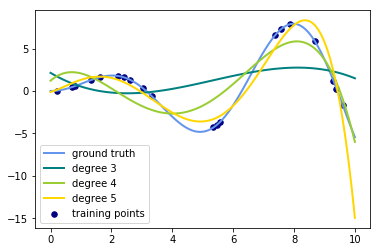

In [18]:
%matplotlib inline
print(__doc__)

# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

This figure is created using the PolynomialFeatures preprocessor. This preprocessor transforms an input data matrix into a new data matrix of a given degree. It can be used as follows:

In [19]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [20]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

The features of `X` have been transformed from $[x_1, x_2]$ to $[1, x_1, x_2, x_1^2, x_1 x_2, x_2^2]$, and can now be used within any linear model.

This sort of preprocessing can be streamlined with the Pipeline tools. A single object representing a simple polynomial regression can be created and used as follows:

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 3., -2.,  1., -1.])

The linear model trained on polynomial features is able to exactly recover the input polynomial coefficients.

In some cases it’s not necessary to include higher powers of any single feature, but only the so-called interaction features that multiply together at most $d$ distinct features. These can be gotten from PolynomialFeatures with the setting `interaction_only=True`.

For example, when dealing with boolean features, $x_i^n = x_i$ for all $n$ and is therefore useless; but $x_i x_j$ represents the conjunction of two booleans. This way, we can solve the XOR problem with a linear classifier:

In [22]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]
y

array([0, 1, 1, 0])

In [23]:
X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
X

array([[1, 0, 0, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 0],
       [1, 1, 1, 1]])

In [24]:
clf = Perceptron(fit_intercept=False, max_iter=10, tol=None,
                 shuffle=False).fit(X, y)

And the classifier “predictions” are perfect:

In [25]:
clf.predict(X)

array([0, 1, 1, 0])

In [26]:
clf.score(X, y)

1.0

**My Question Is "What is the difference between Polynomial Regression and Nural network?"**  
  
[What is the difference between polynomial fitting and neural network training?](https://www.quora.com/What-is-the-difference-between-polynomial-fitting-and-neural-network-training)  
  
>Both approaches try to fit a non-linear function to the data. However, fitting a polynomial is typically much easier since polynomials have a much simpler form than neural networks:  
  
>In contrast, learning a neural network is a non-convex problem that can be much harder to solve, and typically requires good initialization and tuning. But the class of functions that can be learned effectively with a neural network (the “inductive bias”) is richer than polynomials, and many of the successes of neural network/deep learning are due to the rich hierarchical representations that these models are able to learn.  
  
>You could argue that polynomials can approach any function just like neural networks, however the invariances that neural networks learn to encode thanks to their hierarchical architecture make them much more effective for generalization in the context of statistical learning when the data has structure (e.g. in images/audio/text).  